# Equivilent Width

This notebook compares the equivilent widths between the CMFGEN models and CSP spectroscopy.


In [1]:
import numpy as np
from astropy import units as u
from matplotlib import pyplot as plt
from sndata.csp import dr1
from specutils import SpectralRegion, Spectrum1D
from specutils.analysis import equivalent_width
from specutils.fitting import fit_generic_continuum

dr1.download_module_data()


In [2]:
def get_spectra_for_id(obj_id):
    """Get CSP DR1 spectra for a given data id
    
    Args:
        obj_id (str): The ID of the desired object
        
    Returns:
        A list of observed MJD dates for each spectra
        A list of Spectrum1D objects
        A list of fit continuum for each spectra
    """
    
    data = dr1.get_data_for_id(obj_id)
    obs_dates = list(set(data['date']))
    
    spectra, continuums = [], []
    for date in obs_dates:
        data_for_date = data[data['date'] == obs_dates[0]]
        wavelength = data_for_date['wavelength'] * u.AA
        flux = data_for_date['flux'] * u.Unit('erg cm-2 s-1 AA-1')
        
        spec = Spectrum1D(spectral_axis=wavelength, flux=flux)
        cont = fit_generic_continuum(spec)(spec.spectral_axis)
        
        spectra.append(spec)
        continuums.append(cont)
        
    return obs_dates, spectra, continuums


def plot_spectra(obs_dates, spectra, continuums):
    """Plot spectra and their continuums
    
    Args:
        obs_dates     (list[float]): A list of observed MJD dates for each spectra
        spectra  (list[Spectrum1D]): A list of spectra
        continuums (list[Quantity]): A list of fit continuums for each spectra
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for date, spec, cont, axis in zip(obs_dates, spectra, continuums, axes.flatten()):
        axis.plot(spec.spectral_axis, spec.flux, label=str(date))
        axis.plot(spec.spectral_axis, cont, label='Continuum')
        axis.legend()
    
    return fig, axes  


def calc_ew(spectra, continuums, bounds):
    """Calculate the equivilent width for multiple features
    
    Args:
        obs_dates     (list[float]): A list of observed MJD dates for each spectra
        spectra  (list[Spectrum1D]): A list of spectra
        bounds (list[tuple[float]]): A list of bounds for each feature in angstroms
    """
    
    regions = [SpectralRegion(b[0] * u.AA, b[-1] * u.AA) for b in bounds]
    return [equivalent_width(spec / cont, regions=regions) for spec, cont in zip(spectra, continuums)]


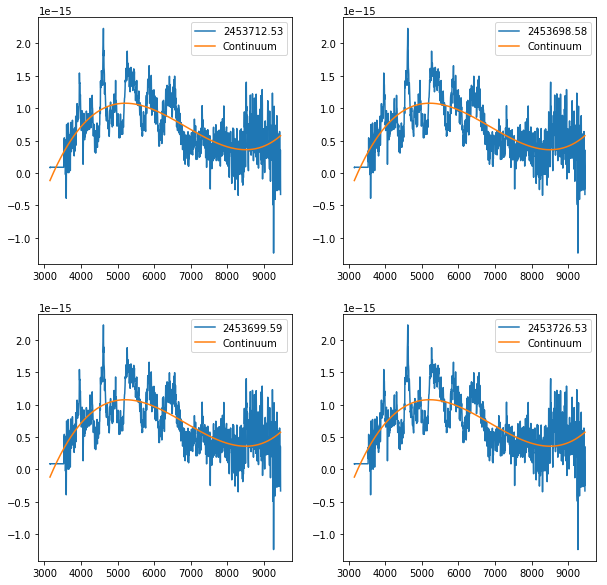

[[<Quantity -3.73412791 Angstrom>, <Quantity -3.73412791 Angstrom>],
 [<Quantity -3.73412791 Angstrom>, <Quantity -3.73412791 Angstrom>],
 [<Quantity -3.73412791 Angstrom>, <Quantity -3.73412791 Angstrom>],
 [<Quantity -3.73412791 Angstrom>, <Quantity -3.73412791 Angstrom>]]

In [3]:
obs_dates, spectra, continuum = get_spectra_for_id('2005kc')
plot_spectra(obs_dates, spectra, continuum)
plt.show()

calc_ew(spectra, continuum, [(6562, 6575), (6562, 6575)])
